In [1]:
import os

import matplotlib.pyplot as plt

test = r"E:\DATN_local\1_IN_USED_DATASET\TEST"
train_dev = r"E:\DATN_local\1_IN_USED_DATASET\TRAIN_DEV"
val = r"E:\DATN_local\1_IN_USED_DATASET\VAL"

In [2]:
import plotly.express as px  # interactive charts

len_ = [len(os.listdir(test)), len(os.listdir(train_dev)), len(os.listdir(val))]

In [3]:
sum(len_)

1683

In [4]:
for l in len_:
    print(l/sum(len_))

0.17587641117052882
0.7231134878193701
0.10101010101010101


In [5]:
import json

json_path = r"E:\DATN_local\1_IN_USED_DATASET\level_label.json"

with open(json_path) as json_file:
    label_dict = json.load(json_file)


list_of_sample = {}

for file in os.listdir(test):
    list_of_sample[file] = label_dict[file[:-4]]

for file in os.listdir(train_dev):
    list_of_sample[file] = label_dict[file[:-4]]

for file in os.listdir(val):
    list_of_sample[file] = label_dict[file[:-4]]

In [6]:
import pandas as pd
sample_level_df = pd.DataFrame(list_of_sample.items(), columns=['Sample', 'Level'])

In [7]:
fig = px.bar(sample_level_df['Level'].value_counts(), )

In [8]:
sample_level_df['Level'] = pd.Categorical(sample_level_df['Level'], categories=[1,2,3,4], ordered=True)

[Text(0, 0, '454'), Text(0, 0, '166'), Text(0, 0, '610'), Text(0, 0, '70')]

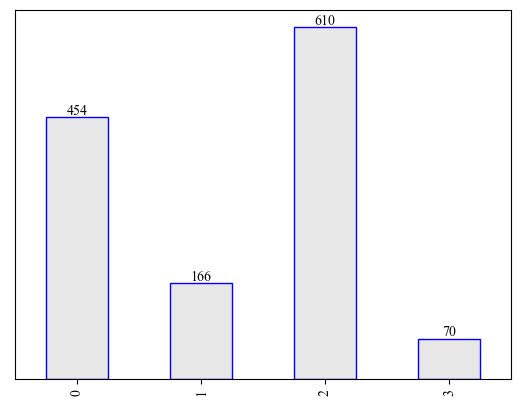

In [9]:
plt.rcParams["font.family"] = "Times New Roman"

ax = sample_level_df['Level'].value_counts().sort_index()

x_label = ['0', '1', '2', '3']
# ax.set_xticklabels()
#
# for bar in ax:
#     yval = bar.get_height()
#     plt.text(bar.get_x(), yval + .005, yval)

# plt.show()
figs = ax.plot(kind='bar', color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')

figs.axes.get_yaxis().set_visible(False)
figs.set_xticklabels(x_label)
figs.bar_label(figs.containers[0], label_type='edge')

In [22]:
import random

choices = random.choices(os.listdir(train_dev), k=5)


In [23]:
choices

['image_275.jpg',
 'NGUYENHUE_SCHOOLGATE_CAM_102.jpg',
 'EUROPEANFLOOD2013_26503361.jpg',
 'image_275.jpg',
 'image_377.jpg']

In [24]:
train_dev_mask = r"E:\DATN_local\1_IN_USED_DATASET\TRAIN_DEV_MASK"
des = r"C:\Users\damti\OneDrive - The University of Technology\Desktop\Study\Do an tot nghiep\paper_development\FIGURE\data_describe"
for im in choices:
    os.system(f'copy "{train_dev}\\{im}" "{des}"')
    os.system(f'copy "{train_dev_mask}\\{im[:-4]}_mask.jpg" "{des}"')

<AxesSubplot:>

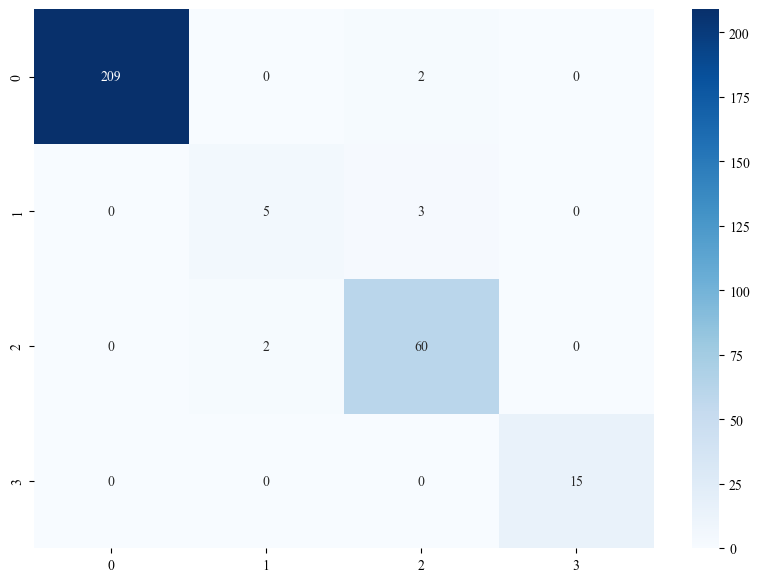

In [29]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[209,   0,   2,   0],
        [  0,   5,   3,   0],
        [  0,   2,  60,   0],
        [  0,   0,   0,  15]]
df_cm = pd.DataFrame(array, index = [i for i in "0123"],
                  columns = [i for i in "0123"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')